In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import matplotlib
data = pd.read_csv('UserBehavior.csv', header=None, nrows=200000,
                   names=['user_id', 'item_id', 'category_id', 'behavior_type', 'time'])  #由于数据量过大这里只导入20万条数据
data.head()

user_id  item_id  category_id behavior_type        time
0        1  2268318      2520377            pv  1511544070
1        1  2333346      2520771            pv  1511561733
2        1  2576651       149192            pv  1511572885
3        1  3830808      4181361            pv  1511593493
4        1  4365585      2520377            pv  1511596146

In [2]:
data.isnull().sum()

user_id          0
item_id          0
category_id      0
behavior_type    0
time             0
dtype: int64

In [3]:
repeat = data.groupby(['user_id','item_id','time']).agg({'user_id':'count'})
repeat[repeat['user_id'] > 1]

Empty DataFrame
Columns: [user_id]
Index: []

In [4]:
data['time'] = pd.to_datetime(data['time'], unit='s') + datetime.timedelta(hours=8)
data.head()

user_id  item_id  category_id behavior_type                time
0        1  2268318      2520377            pv 2017-11-25 01:21:10
1        1  2333346      2520771            pv 2017-11-25 06:15:33
2        1  2576651       149192            pv 2017-11-25 09:21:25
3        1  3830808      4181361            pv 2017-11-25 15:04:53
4        1  4365585      2520377            pv 2017-11-25 15:49:06

In [5]:
data['date'] = data['time'].map(lambda x: x.strftime('%Y-%m-%d %H').split(' ')[0])  # 设置日期列
data['hour'] = data['time'].map(lambda x: x.strftime('%Y-%m-%d %H').split(' ')[1])  # 设置时间列
pd.set_option('display.max_columns', 10)
data.head()

user_id  item_id  category_id behavior_type                time  \
0        1  2268318      2520377            pv 2017-11-25 01:21:10   
1        1  2333346      2520771            pv 2017-11-25 06:15:33   
2        1  2576651       149192            pv 2017-11-25 09:21:25   
3        1  3830808      4181361            pv 2017-11-25 15:04:53   
4        1  4365585      2520377            pv 2017-11-25 15:49:06   

         date hour  
0  2017-11-25   01  
1  2017-11-25   06  
2  2017-11-25   09  
3  2017-11-25   15  
4  2017-11-25   15

In [6]:
data = data.sort_values(by=['date', 'hour'], ascending=True)
data = data.reset_index(drop=True)
data.head(10)

user_id  item_id  category_id behavior_type                time  \
0  1000169  1328010       959452            pv 2017-09-11 16:16:39   
1  1004259  3734552      1573426            pv 2017-11-17 21:22:30   
2  1007503  2137467      2778281            pv 2017-11-19 06:36:15   
3  1006359   359872        84264            pv 2017-11-20 01:32:45   
4  1000801  1034143      2465336            pv 2017-11-20 22:15:14   
5  1007609  4146999       235534            pv 2017-11-22 21:01:05   
6  1007609  2903641      1379146            pv 2017-11-22 21:01:10   
7  1007609  1544812       235534            pv 2017-11-22 21:02:23   
8  1007609  3422704      1379146            pv 2017-11-22 21:02:32   
9  1000807  1662243      3354571            pv 2017-11-23 02:03:21   

         date hour  
0  2017-09-11   16  
1  2017-11-17   21  
2  2017-11-19   06  
3  2017-11-20   01  
4  2017-11-20   22  
5  2017-11-22   21  
6  2017-11-22   21  
7  2017-11-22   21  
8  2017-11-22   21  
9  2017-11-23   02

In [7]:
df_bool = (data.loc[:, 'date'] > '2017-11-24') & (data.loc[:, 'date'] < '2017-12-04')
data = data.loc[df_bool, :].reset_index(drop=True)
data.head(10)

user_id  item_id  category_id behavior_type                time  \
0     1000  1385281      2352202            pv 2017-11-25 00:44:13   
1     1000  5120034      1051370          cart 2017-11-25 00:47:14   
2  1000004  2156592      3607361            pv 2017-11-25 00:00:41   
3  1000004  1591982       672001            pv 2017-11-25 00:02:13   
4  1000084   850738      2058468            pv 2017-11-25 00:55:17   
5  1000084  4288055       144028            pv 2017-11-25 00:56:07   
6  1000084  4474837       144028            pv 2017-11-25 00:56:52   
7  1000084  4288055       144028            pv 2017-11-25 00:57:27   
8  1000084  4474837       144028            pv 2017-11-25 00:58:59   
9  1000084  4288055       144028            pv 2017-11-25 00:59:09   

         date hour  
0  2017-11-25   00  
1  2017-11-25   00  
2  2017-11-25   00  
3  2017-11-25   00  
4  2017-11-25   00  
5  2017-11-25   00  
6  2017-11-25   00  
7  2017-11-25   00  
8  2017-11-25   00  
9  2017-11-25   00

In [8]:
drop_data = data[(data['behavior_type'] != 'pv' ) &
                (data['behavior_type'] != 'cart' ) &
                (data['behavior_type'] != 'buy' ) &
                (data['behavior_type'] != 'fav' )]
drop_data

Empty DataFrame
Columns: [user_id, item_id, category_id, behavior_type, time, date, hour]
Index: []

In [9]:
data.isnull().any()

user_id          False
item_id          False
category_id      False
behavior_type    False
time             False
date             False
hour             False
dtype: bool

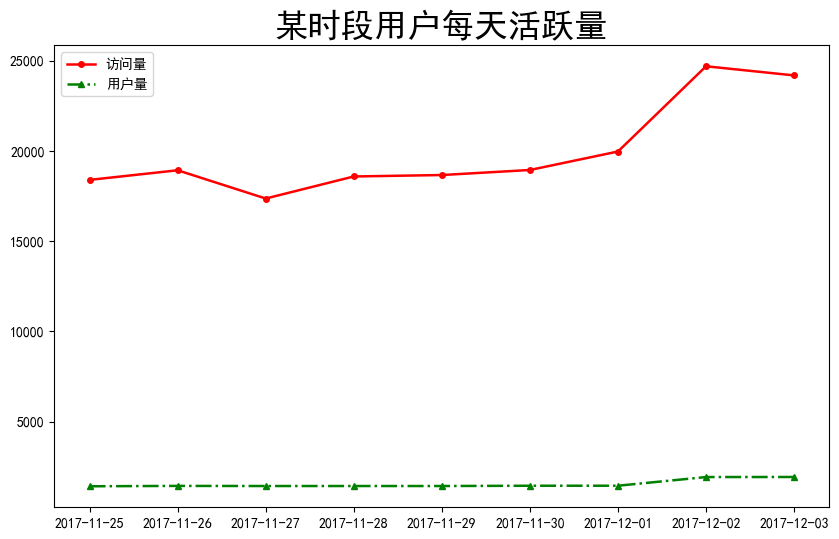

In [10]:

pv_daily = data[data['behavior_type'] == 'pv'].groupby('date')['user_id'].count()
pv_daily = pv_daily.reset_index().rename(columns={'user_id': 'pv'})
uv_daily = data.groupby('date')['user_id'].apply(lambda x: x.drop_duplicates().count())
uv_daily = uv_daily.reset_index().rename(columns={'user_id': 'uv'})
x = pv_daily['date']
y1 = pv_daily['pv']
y2 = uv_daily['uv']
fig = plt.figure(figsize=(10, 6))
matplotlib.rcParams['font.sans-serif'] = ['SimHei']  
matplotlib.rcParams['font.family']='sans-serif'
plt.subplot(1, 1, 1)
plt.plot(x, y1, label='访问量', linewidth=1.8, color='r', marker='o', markersize=4)
plt.plot(x, y2, label='用户量', linewidth=1.8, color='g', linestyle='-.', marker='^', markersize=4)
plt.legend(loc='best')
plt.title("某时段用户每天活跃量", fontsize=24)
plt.show()

In [11]:
from pandas import DataFrame
import pandas as pd
user = {}
user['浏览次数'] = data[data['behavior_type'] == 'pv'].groupby('user_id').agg({'user_id':'count'})
user['加购次数'] = data[data['behavior_type'] == 'cart'].groupby('user_id')['behavior_type'].count()
user['收藏次数'] = data[data['behavior_type'] == 'fav'].groupby('user_id')['behavior_type'].count()
user['购买次数'] = data[data['behavior_type'] == 'buy'].groupby('user_id')['behavior_type'].count()
# data_1 = DataFrame(user,index=[0])
# data_1
user

{'浏览次数':          user_id
 user_id         
 1             55
 100           84
 1000          67
 10001         21
 10008         41
 ...          ...
 1008883      395
 1008891       69
 1008899       86
 1008904      130
 1008905        7
 
 [1967 rows x 1 columns],
 '加购次数': user_id
 1000        2
 10008      12
 10009      11
 10020       2
 10021      17
            ..
 1008882    13
 1008883    10
 1008891     3
 1008899     1
 1008904    20
 Name: behavior_type, Length: 1466, dtype: int64,
 '收藏次数': user_id
 100         6
 1000       12
 10013      38
 10020       1
 10024       2
            ..
 1008829     5
 1008830     4
 1008849     2
 1008860     1
 1008882     1
 Name: behavior_type, Length: 725, dtype: int64,
 '购买次数': user_id
 100         8
 10008       3
 10009      10
 10020       1
 10021       1
            ..
 1008882     2
 1008883     3
 1008891     5
 1008899     1
 1008904     7
 Name: behavior_type, Length: 1369, dtype: int64}

In [12]:
base_count =data[['user_id','item_id','category_id']].nunique()
behaviour_count = data['behavior_type'].count()
print(base_count,'\n','用户行为数：',behaviour_count)


user_id          1973
item_id        117031
category_id      3980
dtype: int64 
 用户行为数： 199908


In [13]:
behaviour_group = data.groupby(['behavior_type']).count()
behaviour_group  # 将用户每种行为分类
PV = behaviour_group[3:4]['user_id'].values[0]
UV = base_count[0:1].values[0]
PV/UV  # 计算访问量与点击量次数比

np.float64(91.09934110491638)

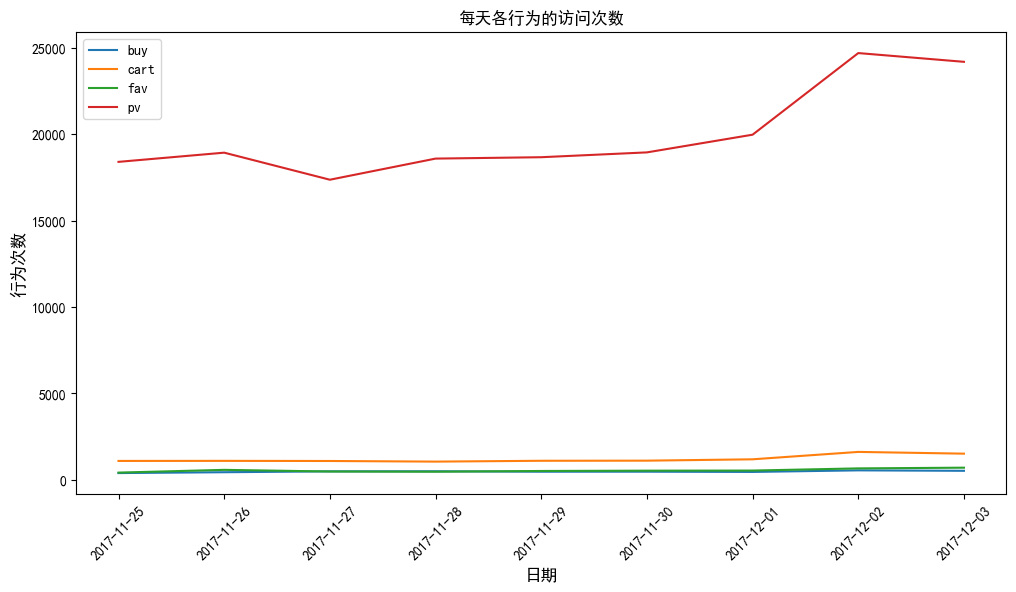

In [15]:
# 确保您的数据集 'data' 包含 'date_column' 列，并且该列是日期时间格式
data['date_column'] = pd.to_datetime(data['date'])

# 使用 groupby 方法按 'behavior_type' 分组
count_by_behav = data.groupby('behavior_type')

plt.figure(figsize=(12,6))

# 遍历每个行为类型的组
for group_name, group_data in count_by_behav:
    # 设置日期时间列为索引
    group_data = group_data.set_index('date_column')
    
    # 使用 resample 方法按天计数
    count_by_day = group_data.resample('D').count()['behavior_type']
    x = count_by_day.index
    y = count_by_day.values
    
    # 绘制图表，使用日期索引而不是 range(len(x))
    plt.plot(x, y, label=group_name)

# 设置 x 轴刻度标签为日期，并旋转 45 度
plt.xticks(rotation=45)
plt.legend(loc='best')
plt.xlabel('日期', fontsize=12)
plt.ylabel('行为次数', fontsize=12)
plt.title('每天各行为的访问次数')

plt.show()

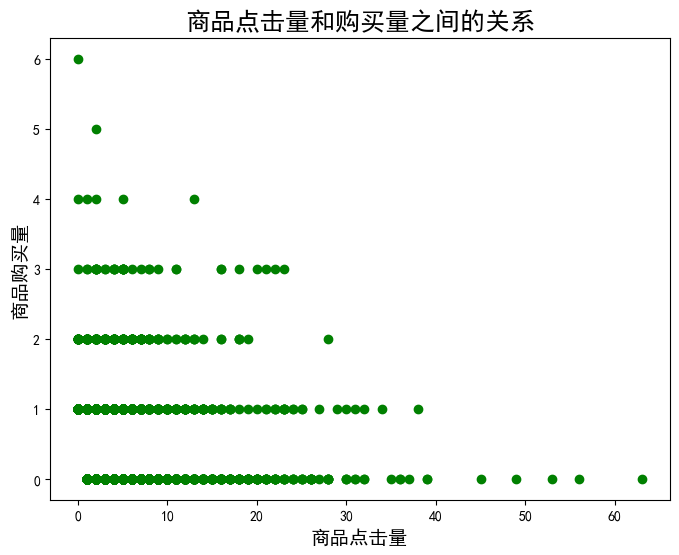

In [16]:
pv_item = data[data['behavior_type'] == 'pv'].groupby('item_id')['user_id'].count().sort_values(ascending=False)
buy_item = data[data['behavior_type'] == 'buy'].groupby('item_id')['user_id'].count().sort_values(ascending=False)
merge2 = pd.merge(pv_item, buy_item, on='item_id', how='outer').fillna(0)
x = merge2['user_id_x']
y = merge2['user_id_y']
plt.figure(figsize=(8, 6))
plt.scatter(x, y, marker='o', color='g')
plt.xlabel("商品点击量", fontsize=14)
plt.ylabel("商品购买量", fontsize=14)
plt.title("商品点击量和购买量之间的关系", fontsize=18)
plt.show()

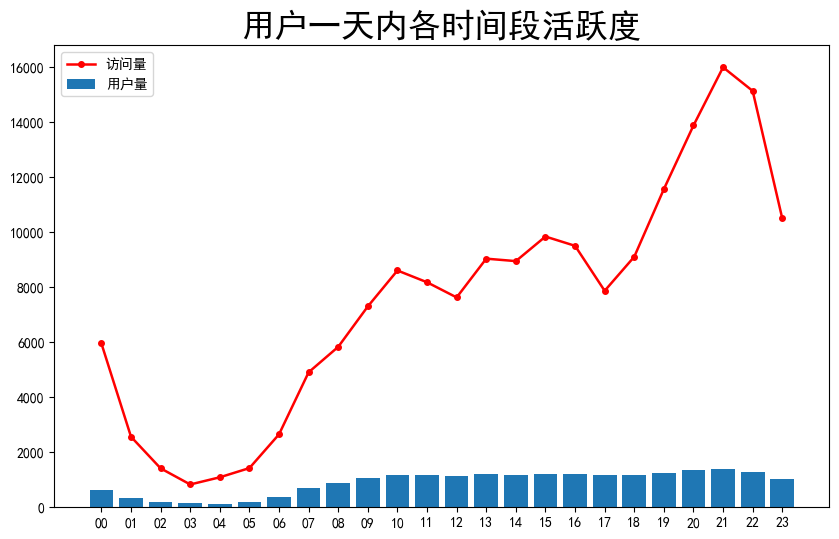

In [17]:
pv_time = data[data['behavior_type'] == 'pv'].groupby('hour')['user_id'].count()
pv_time = pv_time.reset_index().rename(columns={'user_id': 'pv'})
uv_time = data.groupby('hour')['user_id'].apply(lambda x: x.drop_duplicates().count())
uv_time = uv_time.reset_index().rename(columns={'user_id': 'uv'})
x = pv_time['hour']
y1 = pv_time['pv']
y2 = uv_time['uv']
plt.figure(figsize=(10, 6))
plt.subplot(1, 1, 1)
plt.plot(x, y1, label='访问量', color='r', linewidth=1.8, marker='o', markersize=4)
plt.bar(x, y2, label='用户量')
plt.legend(loc='best')
plt.title("用户一天内各时间段活跃度", fontsize=24)
plt.show()

In [19]:
import pandas as pd 
 
data = pd.read_csv('UserBehavior.csv')
# data.head(10)
# data.info()
data

1  2268318  2520377  pv  1511544070
0               1  2333346  2520771  pv  1511561733
1               1  2576651   149192  pv  1511572885
2               1  3830808  4181361  pv  1511593493
3               1  4365585  2520377  pv  1511596146
4               1  4606018  2735466  pv  1511616481
...           ...      ...      ...  ..         ...
100150801  999999  4797808    11120  pv  1512293403
100150802  999999  4613472  4602841  pv  1512293766
100150803  999999  3647364  2304296  pv  1512293792
100150804  999999  1903801  2304296  pv  1512293827
100150805  999999  3696094  4602841  pv  1512293891

[100150806 rows x 5 columns]

In [20]:
data.rename(columns={'收货地址 ': '收货地址', '订单付款时间 ':'订单付款时间'}, inplace=True)
data.columns

Index(['1', '2268318', '2520377', 'pv', '1511544070'], dtype='object')

In [21]:
sum(data['订单付款时间'].isnull())

KeyError: '订单付款时间'

In [ ]:
print(data[data['订单付款时间'].isnull() & data['买家实际支付金额']>0].size)  #  查看缺失值是否为拍下订单但是未付款情况
print(sum(data['订单付款时间'].isnull()) / data.shape[0])  #  查看缺失值与整体数据的比例

In [ ]:
data.duplicated().sum()

In [ ]:
data.describe()

In [ ]:
plt.boxplot(data['总金额'])
plt.show()

In [ ]:
data[data['总金额'] > 175000]


订单编号       总金额  买家实际支付金额 收货地址               订单创建时间 订单付款时间  退款金额
19257  19258  188320.0       0.0   上海  2020-02-24 19:35:06    NaN   0.0

In [ ]:
plt.boxplot(data['买家实际支付金额'])
plt.show()

In [ ]:
data[data['买家实际支付金额'] > 6000]

订单编号      总金额  买家实际支付金额    收货地址               订单创建时间  \
3143    3144  11400.0   11400.0     江苏省  2020-02-18 09:34:43   
13511  13512  16065.0   16065.0  内蒙古自治区  2020-02-26 15:41:27   

                    订单付款时间  退款金额  
3143   2020-02-18 09:34:53   0.0  
13511  2020-02-26 15:42:24   0.0

In [ ]:
plt.boxplot(data['退款金额'])
plt.show()

In [ ]:
data[data['退款金额'] > 2000]

In [ ]:
import numpy as np
np.sum(data['买家实际支付金额'])


In [ ]:
data_area = data.groupby('收货地址').sum()['买家实际支付金额'].sort_values(ascending=False).reset_index()

plt.figure(figsize=(20,8))
plt.bar(data_area['收货地址'], data_area['买家实际支付金额'],width=0.2)
plt.xlabel('')
plt.ylabel('销售额', rotation=0, labelpad=30, fontsize=15)
plt.title('各省市销售额情况', fontsize=20)
plt.xticks(rotation = 45)
plt.show()

In [ ]:
plt.figure(figsize=(20,8),dpi=100)
plt.hist(data[data['总金额'] < 500]['总金额'])
plt.xticks(np.arange(0,500,step=25), fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('订单金额',fontsize=20)
plt.ylabel('订单数',fontsize=20, rotation=0, labelpad=40)
plt.title('订单金额分布情况', fontsize=25)
plt.show()
